In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.datasets import load_breast_cancer 
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure


In [2]:
# For a range in N, when N = 1, 2, ..., K calculate a PCA and return 
# I want this to be able to graph the number N pricipal components that maximizes the accuracy. 

def pca_iterations(K,data,target):
    pca = PCA(n_components = K) 
    principalComponents = pca.fit_transform(data) 
    principalDf = pd.DataFrame(data = principalComponents) # The columns of this will be numbered 0 to K-1 
    finalDF = pd.concat([principalDf, breast_dataset[['targets']]], axis = 1)
        
    return finalDF        

In [3]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$  Problem 1  $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [4]:
# Load Breast Cancer dataset and break up this data into sections for data, labels, and features
breast = load_breast_cancer() 

# Extract data from 'breast' 
breast_data = breast.data 
breast_labels = breast.target
features = breast.feature_names 

# Show the shapes of things, if you would like
# print("Shape of 'breast_data':",breast_data.shape)
# print("Shape of 'features':",features.shape)
# print("Shape of 'breast_labels':",breast_labels.shape)

In [5]:
# Reshape 'breast_labels' into a column vector
targets = np.reshape(breast_labels,(569,1)) 

# print("Shape of 'targets':",targets.shape)
# print("First 5 terms:",targets[:5])

In [6]:
# Create a new dataset called 'final_breast_data' by adding the 
# column 'targets' to the end of 'breast_data'
final_breast_data = np.concatenate([breast_data,targets],axis=1)

# Show the shape of 'final_breast_data'
# final_breast_data.shape 

In [7]:
# Create new dataframe from 'final_breast_data'
breast_dataset = pd.DataFrame(final_breast_data)

In [8]:
# Name all of the features in breast_dataset
features_labels = np.append(features,'targets') 
breast_dataset.columns = features_labels 

In [9]:
# Before beginning PCA, we want to standardize all of the feature samples

from sklearn.preprocessing import StandardScaler 

# Separating out the features  
x = breast_dataset.loc[:, features].values 

# Separating out the target 
y = breast_dataset.loc[:, ['targets']].values

# Standardizing the features array in 'breast_dataset'
x = StandardScaler().fit_transform(x) 

In [10]:
# Defining a max Value of K we want plotted
upperK = 15

In [11]:
# FIGURE OUT HOW TO MAKE THIS WORK WITH SVM
# This is where the PCA algorithm should start. As in the last homework, the accuracy, precision
# and recall should all be calculated for each iteration of the algorithm. 

# for loop to calculate the accuracy, precision, and recall for multiple values of K

#Import svm model
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn import metrics 

# Initial arrays to store evaluation metric data
accuracy = np.zeros(upperK)
precision = np.zeros(upperK)
recall = np.zeros(upperK)

# PCA feature extraction algorithm. Also runs SVM and computes evaluation metrics
for h in range(2,upperK+1):
    h_range = list(range(0,h))
    K1 = pca_iterations(h,x,y)
    
    X = K1.loc[:, h_range].values 
    Y = K1.loc[:, ['targets']].values
    Y_array = Y.reshape(569,)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y_array, test_size = 0.20, random_state = 0)
        
    # Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    cnf_matrix = confusion_matrix(Y_test, Y_pred) 

    # Calculate accuracy, precision, and recall for each iteration
    accuracy[h-2] = round(metrics.accuracy_score(Y_test, Y_pred)*100,1)
    precision[h-2] = round(metrics.precision_score(Y_test, Y_pred)*100,2)
    recall[h-2] = round(metrics.recall_score(Y_test, Y_pred)*100,2)

# Show the evaluation mertic arrays
print("Accuracy Length:",len(accuracy),",",accuracy)
print(" ")
print("Precision Length:",len(precision),",",precision)
print(" ")
print("Recall Length:",len(recall),",",recall)

Accuracy Length: 15 , [92.1 91.2 95.6 95.6 95.6 93.9 94.7 96.5 95.6 95.6 95.6 95.6 96.5 96.5
  0. ]
 
Precision Length: 15 , [95.31 93.85 96.97 95.59 95.59 95.45 96.92 97.01 96.97 96.97 96.97 96.97
 97.01 97.01  0.  ]
 
Recall Length: 15 , [91.04 91.04 95.52 97.01 97.01 94.03 94.03 97.01 95.52 95.52 95.52 95.52
 97.01 97.01  0.  ]


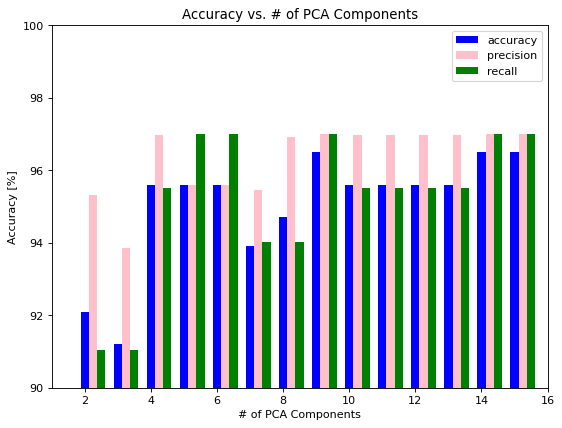

In [15]:
# This plots accuracy over multiple # of PCA component. It seems the minimum amount of PCA 
# components needed to obtain a good accuracy is 12. When a higher value of upperK is used
# the results do not get any better.

yes = np.arange(upperK)
for i in range(len(yes)):
    yes[i] = yes[i] + 2

width = 0.25       
# plt.bar(ind, men_means, width, label='Men')
# plt.bar(ind + width, women_means, width, label='Women')    

figure(figsize=(8, 6), dpi=80)
plt.bar(yes, accuracy, color='blue',width=0.25, label = "accuracy")
plt.bar(yes+width, precision, color='pink',width=0.25, label = "precision")
plt.bar(yes+width+width, recall, color='green',width=0.25, label = "recall")

plt.xlabel("# of PCA Components")
plt.ylabel("Accuracy [%]")
plt.title("Accuracy vs. # of PCA Components")
plt.axis([1, upperK+1, 90, 100])
plt.legend(loc='best')
plt.show()

In [ ]:
# Explore different kernel tricks to capture non-linearities within your data.  
# Plot the resultsand compare the accuracies for different kernels.

In [ ]:
# Compare your results against the logistic regression that you have done in homework 3.

In [ ]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$  Problem 2  $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [17]:
# This section is for SVR regression model to predict housing prices that were seen in HW1

# Import housing list 
housing = pd.read_csv('Housing.csv')
print(housing.shape)

# 1a Variables
varlist1 = ['area','bedrooms','bathrooms','stories','parking','price']

# 1b Variables
varlist2 = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','price']

housing.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
